NETSIZES:  [1, 2, 4, 8, 12, 16]
data keys:  dict_keys([1, 2, 4, 8, 12, 16])


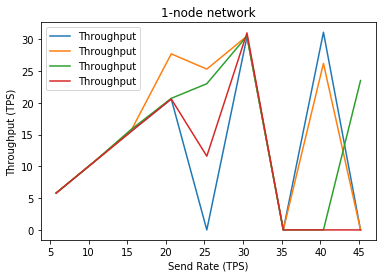

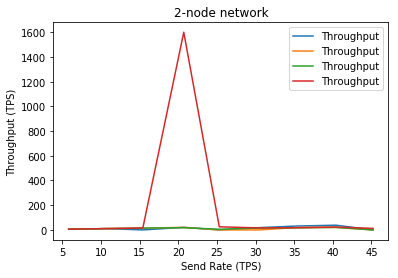

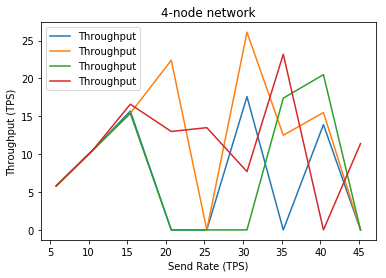

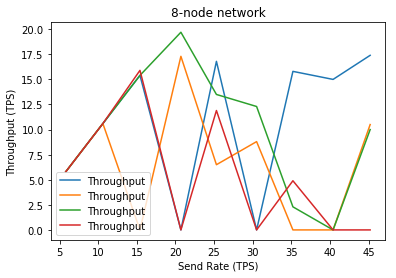

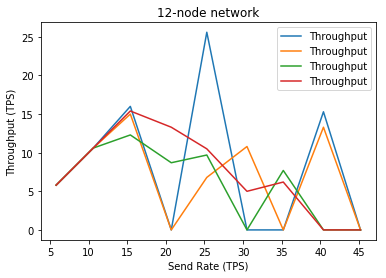

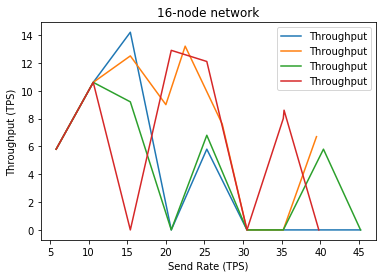

In [37]:
import pandas as pd
import os

#RESULTSDIR = "/Users/amiecorso/caliper/experiments/arch_exps/poet_intkey_1.0-1248-1/results/"
RESULTSDIR = "/Users/amiecorso/caliper/experiments/arch_exps/poet_intkey_1.0-12481216-1/results/"
# automatically detect network sizes from contents of results dir
NETSIZES = []
for dirname in os.listdir(RESULTSDIR):
    NETSIZES.append(int(dirname))
NETSIZES.sort()
print("NETSIZES: ", NETSIZES)

data = {}
for netsize in NETSIZES:
    DATADIR = RESULTSDIR + str(netsize)
    data[netsize] = [] # make a list of dataframes for given netsize
    for csvfile in os.listdir(DATADIR):
        df = pd.read_csv(DATADIR + "/" + csvfile)
        # cut off "tps" & make numeric
        #df['Name'] = pd.to_numeric(df['Name'].apply(lambda x: x.split(' ')[0]))
        df['Send Rate'] = pd.to_numeric(df['Send Rate'].apply(lambda x: x.split(' ')[0]))
        df['Throughput'] = pd.to_numeric(df['Throughput'].apply(lambda x: x.split(' ')[0]))
        #print(df.head(5))
        data[netsize].append(df)
        #break # let's just start by doing this for one file

print("data keys: ", data.keys())
# plot the data
for netsize in data:
    frames = data[netsize]
    ax = frames[0].plot(x="Send Rate", y="Throughput", title=str(netsize) + "-node network")
    for i in range(1, len(frames)):
        frames[i].plot(x="Send Rate", y="Throughput", ax=ax)
    ax.set(xlabel="Send Rate (TPS)", ylabel="Throughput (TPS)")

    
